### ANALISIS DE LA BASE DE DATOS

**Variables categóricas**
- **Potability**: Potabilidad del agua.
    - **Descripción**: Indica si el agua es potable con valores 1 (potable) y 0 (no potable).

**Variables continuas**
- **pH**: Mide el nivel de acidez o alcalinidad del agua.
    - **Descripción**: En el Data Frame, podemos ver como el pH en las muestras potables, es del rango establecido como "saludable", que va desde 6.5 hasta 8.5
- **Hardness**: Minerales disueltos en el agua.
    - **Descripción**: Las mismas son encontradas en las muestras por el roce con las piedras, arenas, plantas...El tiempo que el agua esta en contacto con estas sales/minerales, determina su dureza.
- **Solids**: Sólidos organicos/no organicos totales disueltos en el agua.
    - **Descripción**: Estos minerales producen efectos de sabor/coloracion en el agua. Un alto nivel de solidos, indica una muestra demasiado mineralizada. Lo deseable se encuentra entre 500mg/l y 1000mg/l.
- **Chloramines**: Desinfectantes (cloros).
    - **Descripción**: La cloración tiene como objetivo principal eliminar o inactivar microorganismos patógenos, como bacterias, virus y parásitos, que podrían estar presentes en el agua y que podrían causar enfermedades si son ingeridos. Los limites saludables son de hasta 4mg/l.
- **Sulfate**: Sustancias encontradas en minerales, piedras, plantas...
    - **Descripción**: Los sulfatos son una mezcla de oxígeno y azufre y son partes de las sustancias existentes en algunas formaciones de rocas y suelos que incorporan agua subterránea. El mineral se convierte gradualmente en una solución y se libera al agua subterránea.
- **Conductivity**: Conductividad de la muestra.
    - **Descripción**: Las sales disueltas en agua se descomponen en iones cargados positivamente y negativamente. La conductividad se define como la capacidad del agua para conducir una corriente eléctrica a travéz de los iones disueltos. Los iones más positivos son sodio (Na+), calcio (Ca+2), potasio (K+) y magnesio (Mg+2). No se deberia exceder de los 400μS/cm
- **Organic_carbon**: Representa el contenido de carbono orgánico en el agua.
    - **Descripción**: El carbono orgánico total es la medida de todo el carbono que contiene la materia orgánica disuelta o particulada presente en la muestra de agua. El origen de esta materia orgánica es, principalmente, sustancias vegetales o animales, contaminaciones que se producen en el sistema de distribución. Su presencia por encima de los valores establecidos, al reaccionar con los agentes desinfectantes utilizados en la potabilización, como el cloro, pueden dar lugar a subproductos de la desinfección nocivos para la salud. Lo recomendable se encuentra en < 2mg/l cuando el agua es potable, y < 4mg/l cuando el agua esta en tratamiento
- **Trihalomethanes**: Concentración de trihalometanos en el agua.
    - **Descripción**: Los trihalometanos son unos subproductos de la desinfección que se forman cuando se emplea el cloro como desinfectante. Los trihalometanos que se encuentran en el agua de consumo humano son el cloroformo, el bromodiclorometano, el dibromoclorometano y el bromoformo. Hasta 80 ppm, se consideran seguros.
- **Turbidity**: Grado de transparencia que pierde el agua.
    - **Descripción**: La turbidez es una medida de la cantidad de partículas en suspensión en el agua. Cuanto mayor sea la cantidad de sólidos suspendidos en el líquido, como las algas, sedimentos,materia orgánica y los contaminantes, mayor será el grado de turbidez.

*EJEMPLO DE MUESTRAS DE AGUA:*

**AGUA POTABLE**

_pH: 9.45 (bastante alcalino)._

_Hardness: 145.80 (pocos minerales disueltos)._

_Solids: 13,168 mg/L (niveles bajos de sólidos disueltos)._

_Chloramines: 9.44 mg/L (alto nivel de cloraminas)._

_Sulfate: 310.58 mg/L (nivel moderado de sustancias)._

_Conductivity: 592.66 µS/cm (alta conductividad => buena cantidad de sales)._

_Organic_carbon: 8.61 mg/L (nivel moderado de carbono orgánico)._

_Trihalomethanes: 77.58 µg/L (dentro del rango aceptable)._

_Turbidity: 3.87 NTU (turbiedad aceptable moderada)._

**AGUA NO POTABLE**:

_pH: No disponible (dato faltante)._

_Hardness: 204.89 (minerales disueltos moderados)._

_Solids: 20,791 mg/L (nivel bastante alto de sólidos disueltos)._

_Chloramines: 7.30 mg/L (nivel relativamente alto)._

_Sulfate: 368.52 mg/L (nivel alto de sustancias en el agua)._

_Conductivity: 564.31 µS/cm (nivel alto => buena cantidad de sales)._

_Organic_carbon: 10.38 mg/L (nivel elevado de carbono orgánico)._

_Trihalomethanes: 86.99 µg/L (por encima del límite superior)._

_Turbidity: 2.96 NTU (dentro de los límites aceptables)._

**Determinación de valores clave.**
En base en las características de las muestras, ciertos valores parecen ser determinantes:

pH: Aunque en este caso el agua potable tiene un pH elevado (9.45), en general un pH fuera del rango neutro (6.5-8.5) podría indicar no potabilidad.

Solids: Niveles muy altos de sólidos disueltos (>20,000 mg/L) parecen estar asociados con agua no potable, ya que superan ampliamente el promedio de 22,014 mg/L.

Sulfate: El agua no potable tiene niveles más altos de sulfato (>360 mg/L), mientras que el agua potable está en un rango más moderado (300-350 mg/L).

Organic_carbon: El agua no potable tiende a tener niveles elevados de carbono orgánico (>10 mg/L), lo que puede indicar contaminación orgánica.

Trihalomethanes: Niveles superiores a 80 µg/L pueden ser un indicador de no potabilidad.

**Reglas aproximadas basadas en los datos:**

Si pH < 6.5 o pH > 8.5, el agua tiende a ser menos potable.

Si Solids > 20,000 mg/L, el agua tiende a ser menos potable.

Si Sulfate > 360 mg/L, el agua tiende a ser menos potable.

Si Organic_carbon > 10 mg/L, el agua tiende a ser menos potable.

#### Primero importamos las librerias, y cargamos el DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from script_funciones import scattered, boxplot, catplot, histograms, matrix_corr, pplot, \
    descarte, carga_nans, limpieza, estandarizacion, grafico_acc

pd.set_option('display.width', 1000)

df = pd.read_csv('./csvs/water_potability.csv', sep=',')

Pequeño vistaso de nuestro DataFrame

In [ ]:
print('\n','Drescripcion del DF sin procesar', '\n\n', df.describe(), sep='')
print('\n','15 Primeras filas', '\n\n',df.head(15), sep='')
nans = df[df.columns[df.isnull().any()]]
print('\n','NaNs por columna', '\n\n',(nans.isnull().sum()), sep='')

Primero vamos a analizar los datos como vienen directamente del CSV. Vamos a proceder a graficar los valores sueltos x columna, histogramas, y matriz de correlacion para tener un mejor entendimiento del Data Frame.
Si bien en los valores no hay gran cantidad de atipicos, si se puede ver en los distintos graficos la poca relacion que tienen entre ellos, y con la potabilidad.

Graficos de puntos de las columnas

In [ ]:
scattered(df, 9)

Graficos de distribucion (tipo boxplot) de los datos

In [ ]:
boxplot(df, 9) # dejar en 9

In [ ]:
catplot(df, last_col=9, hue='Potability')
# No prestar atencion al 'Passing 'palette' without...' si se hace eso el grafico no queda como quiero

Histogramas

In [ ]:
histograms(df, 9)

Matriz de correlacion

In [ ]:
matrix_corr(df)

Pairplot de seaborn

In [ ]:
pplot(df, 'Potability')

Una vez habiendo visto esto, vamos a procesar los datos de la siguiente manera:

- Primero generamos 2 nuevos dataframes, uno que va a contener todos los valores que no sean potables, y otro los que si:

In [ ]:
df_ceros = descarte(df, 'Potability', 0) # <- arma un dataframe nuevo con las muestras no potables
df_unos = descarte(df, 'Potability', 1) # <- arma un dataframe nuevo con las muestras potables

- Una vez hecho eso, cargamos en el DataFrame original las medianas de las respectivas columnas donde haya NaNs, dependiendo de si el valor de potabilidad es 0 o 1.

In [ ]:
df = carga_nans(df, df_ceros, df_unos) # <- carga los nans con las medianas dependiendo si es o no potable

- Limpiamos los atipicos (este paso podria omitirse para diferentes testeos a la hora de entrenar la red)

In [ ]:
df = limpieza(df)

Vistazo del nuevo Data Frame (previo a estandarizar)

In [ ]:
print(df.describe())

- Y estandarizamos los datos para que nos queden todos con una media de 0, logrando que nuestra red trate los datos de manera mas equilibrada. Todos los datos van a estar en la misma escala, medidos en desviaciones estandar desde la media.

In [ ]:
df = estandarizacion(df)[0]

Verifiquemos como quedaron los datos

In [ ]:
print('\n','Drescripcion del DF post procesamiento', '\n\n', df.describe(), sep='')
print('\n','15 Primeras filas', '\n\n',df.head(15), sep='')
nans = df[df.columns[df.isnull().any()]]
print('\n','NaNs por columna', '\n\n',(nans.isnull().sum()), sep='')

# RED NEURONAL

#### Arquitectura de la red

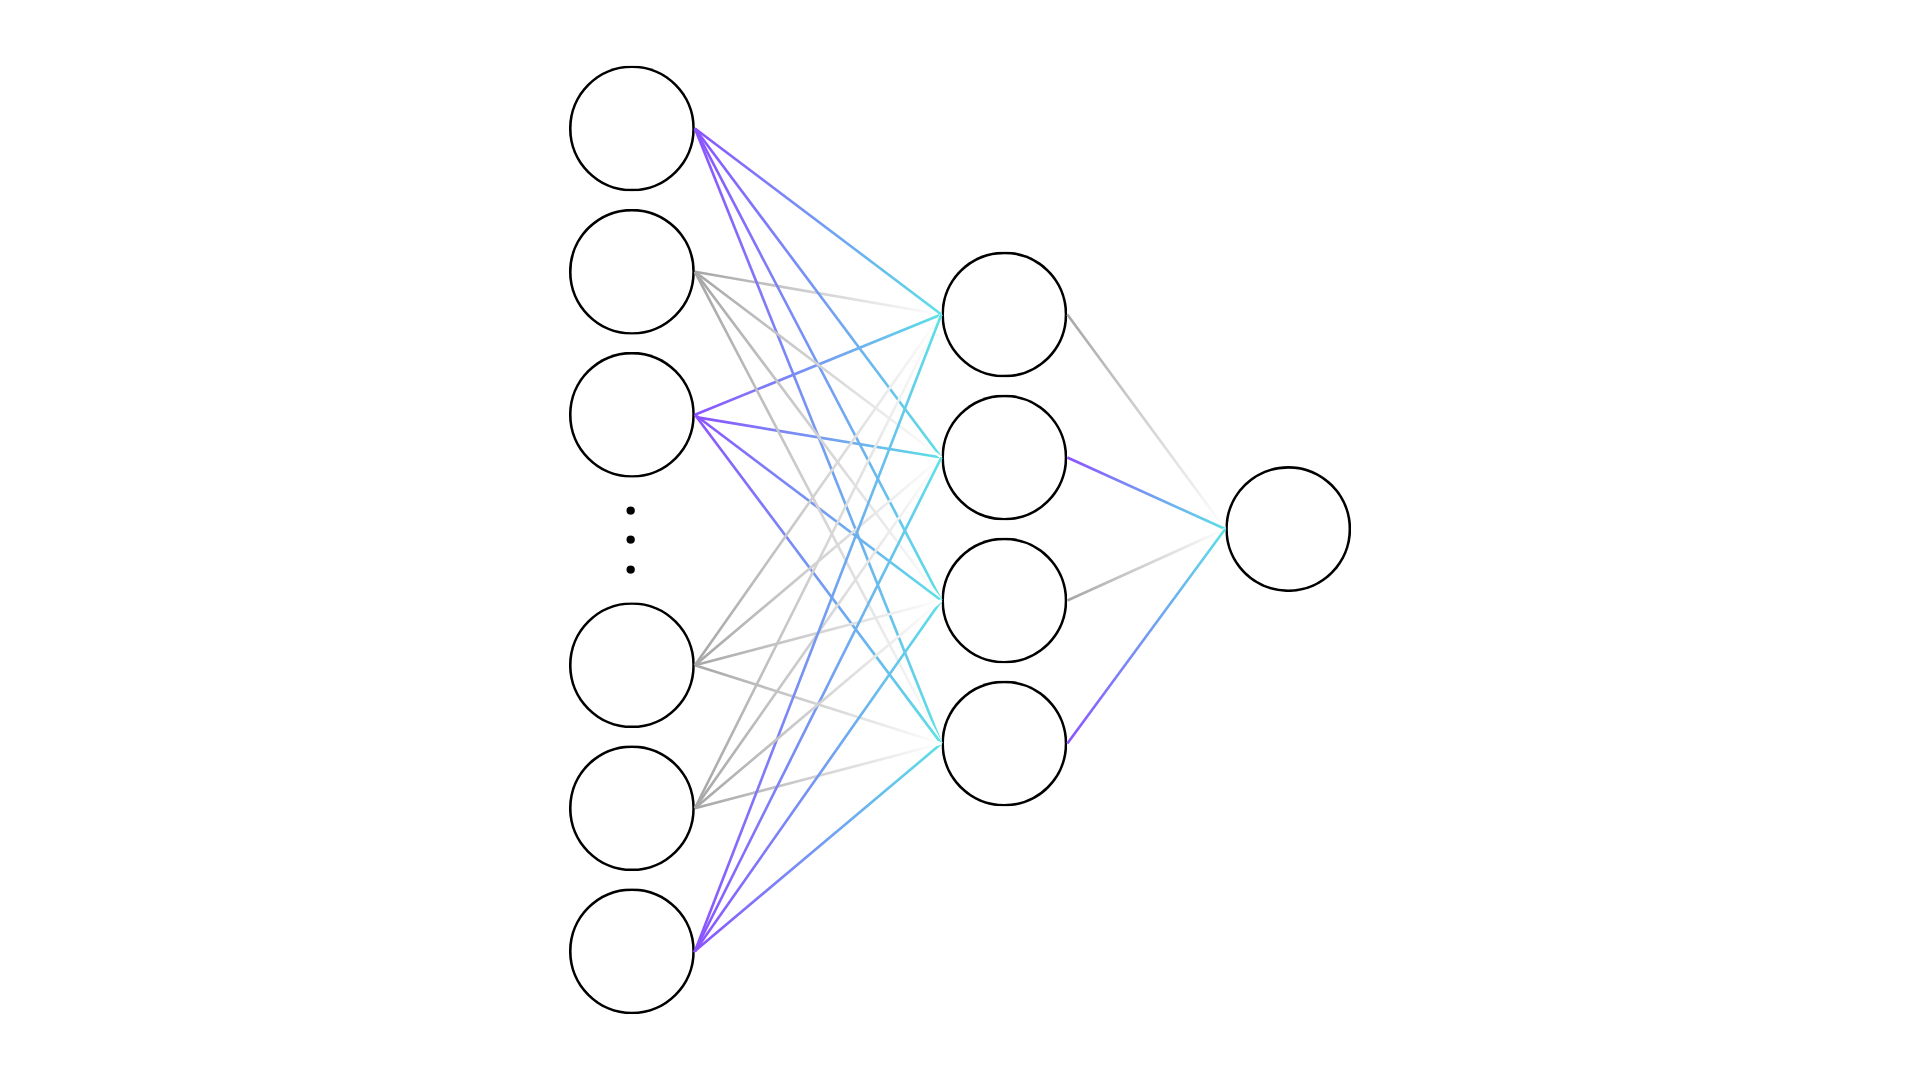
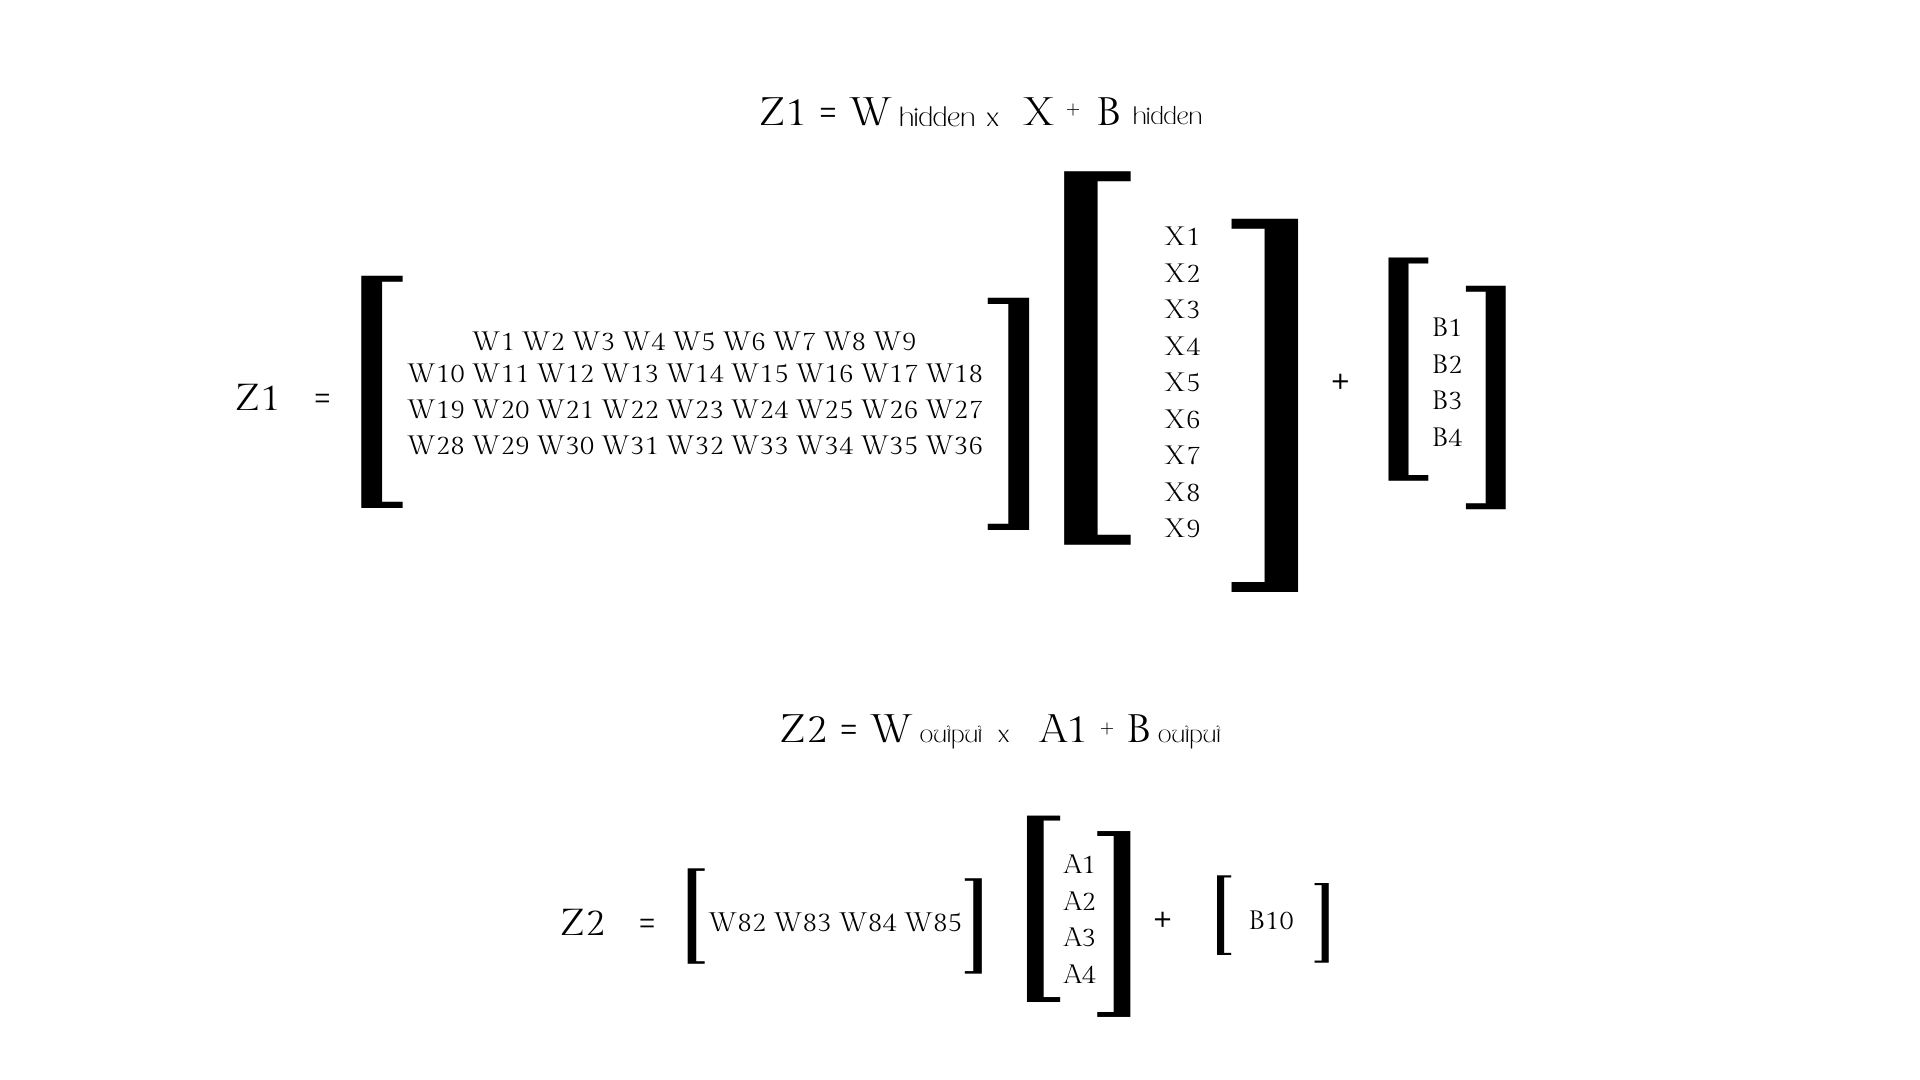

- Capas
    - La red dispondria de 3 capas: 1 de entrada, 1 capa oculta y 1 de salida.

- Neuronas
    - En la capa de entrada habra tantas neuronas como columnas (datos de entrada), en la capa oculta, 4. En la ultima habra 1 solo nodo, ya que solamente son dos posibles salidas.

- Funciones de Activacion
    - ReLu en las ocultas, Sigmoide en la de salida

#### Separacion Train/Test

Para empezar con la red, separamos de una vez los datos en conjuntos de entrenamiento y testeo, para despues poder ir repitiendo el entrenamiento siempre con los mismos datos.

In [ ]:
# Extraigo las columnas de entrada
inputs = df.iloc[:, 0:9].values
outputs = df.iloc[:, -1].values

# Conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=1/3)

#shape retorna una tupla con las dimensiones de la matriz = (filas, columnas).
# por lo que shape[0], nos retorna las filas de la matriz.
n_train = x_train.shape[0] # numero de registros de entrenamiento

Construimos la red neuronal con pesos y sesgos aleatorios (tanto positivos como negativos), funciones ReLu y Sigmoide, _**Forward Propagation**_ y _**Backward Propagation**_, las cuales se van a encargar de recorrer la red de izquierda a derecha y viceversa, primero con los pesos y sesgos aleatorios. Una vez finalizado el primer recorrido (izqueirda -> derecha), actualiza los mismos buscando el menor error posible, y vuelve a empezar, de esta manera se minimiza el error.

In [ ]:
def red_neuronal(L, epochs):
    np.random.seed(0)
    # pesos
    # con 4 tiene muy buenos graficos
    w_hidden_1 = np.random.rand(4,9) * 2 - 1
    w_output_1 = np.random.rand(1,4) * 2 - 1

    # sesgos
    b_hidden = np.random.rand(4,1) * 2 - 1
    b_output = np.random.rand(1,1) * 2 - 1

    # Funciones de Activacion
    relu = lambda x: np.maximum(x, 0)
    sigmoide = lambda x: 1 / (1 + np.exp(-x))

    def f_prop(X):
        z1 = w_hidden_1 @ X + b_hidden
        a1 = relu(z1)
        z2 = w_output_1 @ a1 + b_output
        a2 = sigmoide(z2)
        return z1, a1, z2, a2

    # Derivadas de las funciones de activación
    d_relu = lambda x: x > 0
    d_sigmoide = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

    # Devuelve pendientes para pesos y sesgos
    # usando la regla de la cadena
    def b_prop(z1, a1, z2, a2, X, Y):
        dC_dA2 = 2 * a2 - 2 * Y
        dA2_dZ2 = d_sigmoide(z2)
        dZ2_dA1 = w_output_1
        dZ2_dW2 = a1
        dZ2_dB2 = 1
        dA1_dZ1 = d_relu(z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    # Para el grafico de las funciones
    accuracy_train_l = []
    accuracy_test_l = []

    # Ejecutar descenso de gradiente
    for i in range(epochs):
        # seleccionar aleatoriamente uno de los datos de entrenamiento
        idx = np.random.choice(n_train, 1, replace=False)
        X_sample = x_train[idx].transpose()
        Y_sample = y_train[idx]
        
        # pasar datos seleccionados aleatoriamente a través de la red neuronal
        Z1, A1, Z2, A2 = f_prop(X_sample)

        # distribuir error a través de la retropropagación
        # y devolver pendientes para pesos y sesgos
        dW1, dB1, dW2, dB2 = b_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        # actualizar pesos y sesgos
        w_hidden_1 -= L * dW1
        b_hidden -= L * dB1
        w_output_1 -= L * dW2
        b_output -= L * dB2

        # Accuracy
        # Test
        test_predictions = f_prop(x_test.transpose())[3]
        test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), y_test)
        accuracy_test = sum(test_comparisons.astype(int) / x_test.shape[0])
        accuracy_test_l.append(accuracy_test)
        
        # Train
        train_predictions = f_prop(x_train.transpose())[3]
        train_comparisons = np.equal((train_predictions >= .5).flatten().astype(int), y_train)
        
        accuracy_train = sum(train_comparisons.astype(int) / x_train.shape[0])
        accuracy_train_l.append(accuracy_train)

    print("TRAIN ACCURACY: ", accuracy_train)
    print("TEST ACCURACY: ", accuracy_test)
    print(f'Epochs: {epochs}')
    print(f'Paso: {L}')
    grafico_acc(L=L, train_l=accuracy_train_l, test_l=accuracy_test_l)


Y ahora si, entrenamos la _**Red**_

In [ ]:
epochs = [10_000, 20_000, 50_000]
eles = [.01, .001, .03]

for rep in epochs:
    for ele in eles:
        red_neuronal(L=ele, epochs=rep)